In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
my_train_data=pd.read_excel("Data_Train.xlsx")

In [52]:
my_train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [53]:
my_train_data.shape

(10683, 11)

In [54]:
my_train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [55]:
my_train_data.dropna(inplace=True)

In [56]:
my_train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [57]:
my_train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [58]:
my_train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [59]:
def change_dtype(col):
    my_train_data[col]=pd.to_datetime(my_train_data[col])

In [60]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_dtype(i)

In [61]:
my_train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [62]:
my_train_data['journey_day']=my_train_data["Date_of_Journey"].dt.day
my_train_data['journey_month']=my_train_data["Date_of_Journey"].dt.month

In [63]:
my_train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-07-05 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-05 05:50:00,2021-07-05 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-05 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-07-05 18:05:00,2021-07-05 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-07-05 16:50:00,2021-07-05 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [64]:
my_train_data.drop("Date_of_Journey",axis=1,inplace=True)

In [65]:
my_train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-07-05 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-05 05:50:00,2021-07-05 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-05 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-05 18:05:00,2021-07-05 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-05 16:50:00,2021-07-05 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [66]:
def convert_inhour(df,col):
    df[col+"_hour"]=df[col].dt.hour
def convert_inminute(df,col):
    df[col+"_minute"]=df[col].dt.minute
def drops(df,col):
    df.drop(col,axis=1,inplace=True)

In [67]:
convert_inhour(my_train_data,"Dep_Time")
convert_inminute(my_train_data,"Dep_Time")
drops(my_train_data,"Dep_Time")
convert_inhour(my_train_data,"Arrival_Time")
convert_inminute(my_train_data,"Arrival_Time")
drops(my_train_data,"Arrival_Time")

In [68]:
my_train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10


In [69]:
Duration=list(my_train_data["Duration"])

In [70]:
for i,ti in enumerate(Duration):
    if len(ti.split())==2:
        pass
    else:
        if 'h' in ti:
            Duration[i]=Duration[i]+' 0m'
        else:
            Duration[i]='0h '+Duration[i]

In [71]:
my_train_data['Duration']=Duration

In [72]:
my_train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [73]:
def hour(x):
    return x.split(' ')[0][0:-1]
def minute(x):
    return x.split(' ')[1][0:-1]

In [74]:
my_train_data['Duration_hour']=my_train_data['Duration'].apply(hour)
my_train_data['Duration_minute']=my_train_data['Duration'].apply(minute)

In [76]:
drops(my_train_data,'Duration')

In [77]:
my_train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [80]:
my_train_data['Duration_hour']=my_train_data['Duration_hour'].astype(int)
my_train_data['Duration_minute']=my_train_data['Duration_minute'].astype(int)

In [81]:
my_train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour           int32
Duration_minute         int32
dtype: object

In [87]:
categorical_data=[col for col in my_train_data.columns if my_train_data[col].dtype=='O']
print(categorical_data)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [88]:
cont_data=[col for col in my_train_data.columns if my_train_data[col].dtype!='O']
print(cont_data)

['Price', 'journey_day', 'journey_month', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour', 'Duration_minute']


In [89]:
categorical=my_train_data[categorical_data]

In [90]:
categorical

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [96]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

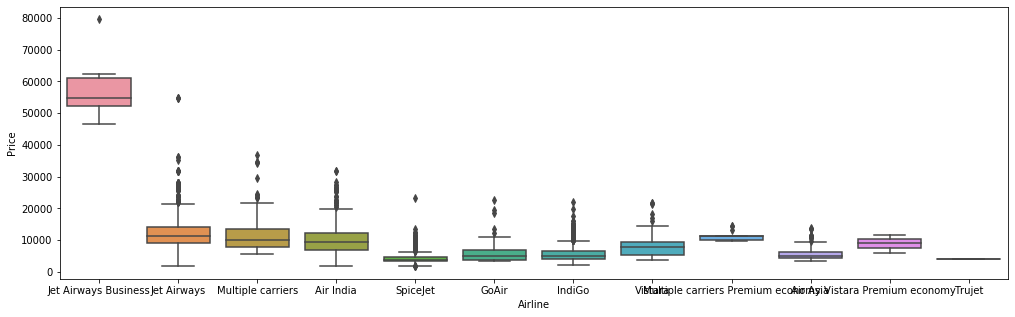

In [102]:
plt.figure(figsize=(17,5))
sns.boxplot(x='Airline',y='Price',data=my_train_data.sort_values('Price',ascending=False))

In [103]:
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [104]:
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [106]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

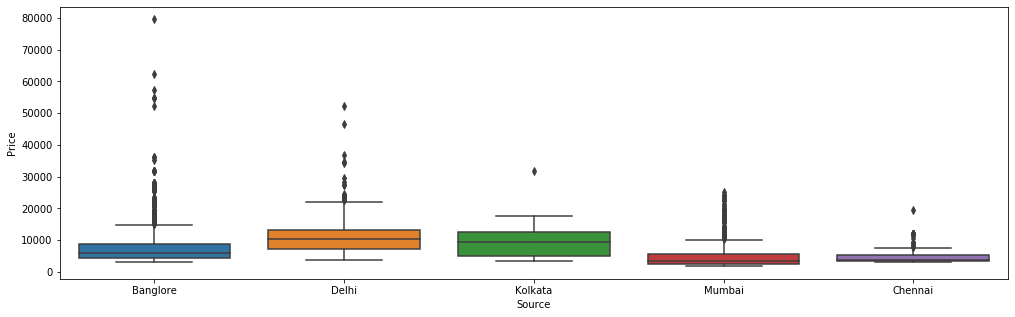

In [107]:
plt.figure(figsize=(17,5))
sns.boxplot(x='Source',y='Price',data=my_train_data.sort_values('Price',ascending=False))

In [108]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)

In [109]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [110]:
Destination=pd.get_dummies(categorical['Destination'],drop_first=True)

In [111]:
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [112]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [115]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [116]:
dic={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [117]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dic)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
categorical['Route'].str.split('→')

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [130]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [131]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,BLR,NAG,DEL,NaN,NaN


In [132]:
drops(categorical,'Route')

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [133]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1,No info,BLR,NAG,DEL,NaN,NaN


In [136]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [138]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None',inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [139]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [140]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [141]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [142]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [146]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [147]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5


In [148]:
drops(categorical,'Additional_Info')

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [149]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [150]:
drops(categorical,'Airline')
drops(categorical,'Destination')
drops(categorical,'Source')

In [151]:
categorical.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,0,13,29,13,5
1,2,2,25,1,3,5
2,2,3,32,4,5,5
3,1,2,34,3,13,5
4,1,0,34,8,13,5


In [154]:
my_data=pd.concat([categorical,Airline,Source,Destination,my_train_data[cont_data]],axis=1)

In [158]:
pd.set_option('display.max_columns',35)
my_data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [167]:
#plot graph to see outlier
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

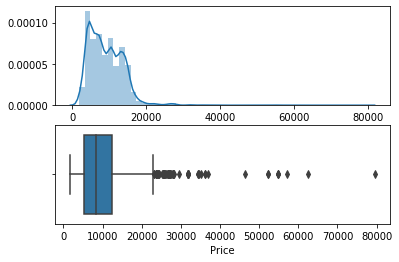

In [168]:
plot(my_data,'Price')

In [169]:
my_data['Price']=np.where(my_data['Price']>=40000,my_data['Price'].median(),my_data['Price'])

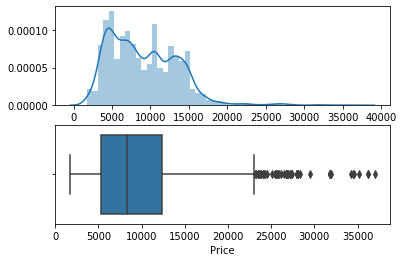

In [170]:
plot(my_data,'Price')

In [172]:
X=my_data.drop('Price',axis=1)

In [174]:
X.shape

(10682, 34)

In [176]:
Y=my_data['Price']

In [177]:
Y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [178]:
from sklearn.feature_selection import mutual_info_classif

In [179]:
mutual_info_classif(X,Y)

array([2.18133020e+00, 2.06085169e+00, 2.74882868e+00, 2.34364285e+00,
       1.50762793e+00, 7.94219209e-01, 7.60701198e-01, 1.06491950e-01,
       6.69880772e-01, 9.16281169e-01, 0.00000000e+00, 5.49854364e-01,
       1.24351899e-02, 3.21588290e-01, 2.06017894e-02, 2.24127704e-01,
       2.35380693e-03, 1.70959904e-01, 1.53071977e+00, 8.85517744e-01,
       2.93107778e-01, 1.53829698e+00, 4.11655193e-01, 2.84802074e-01,
       1.70150963e-01, 3.65184575e-01, 1.06595220e+00, 8.86372671e-01,
       1.41633522e+00, 1.20230218e+00, 1.83914200e+00, 1.52076189e+00,
       1.76499078e+00, 1.07939344e+00])

In [180]:
imp=pd.DataFrame(mutual_info_classif(X,Y),index=X.columns)
imp

,0
Total_Stops,2.168554
Route_1,2.041072
Route_2,2.800413
Route_3,2.337443
Route_4,1.454061
Route_5,0.749694
Air India,0.761646
GoAir,0.088676
IndiGo,0.666603
Jet Airways,0.947555


In [181]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.800413
Route_3,2.337443
Total_Stops,2.168554
Route_1,2.041072
Arrival_Time_hour,1.846663
Duration_hour,1.799454
Cochin,1.555069
Delhi,1.541595
Arrival_Time_minute,1.530397
Route_4,1.454061


In [182]:
from sklearn.model_selection import train_test_split

In [183]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2)

In [205]:
from sklearn import metrics
import pickle

In [236]:
def predict(model,dump):
    model=model.fit(x_train,y_train)
    print("Training score is {}".format(model.score(x_train,y_train)))
    y_predict=model.predict(x_test)
    print("predictions are {}".format(y_predict))
    print("\n")
    r2_score=metrics.r2_score(y_test,y_predict)
    print("r2 score is {}".format(r2_score))
    print("MAE IS {}".format(metrics.mean_absolute_error(y_test,y_predict)))
    print("MSE IS {}".format(metrics.mean_squared_error(y_test,y_predict)))
    print("RMSE IS {}".format(np.sqrt(metrics.mean_absolute_error(y_test,y_predict))))
    sns.distplot(y_test-y_predict)
    if dump==1:
        file=open('D:\dumpmodel/model.pkl','wb')
        pickle.dump(model,file)

In [237]:
from sklearn.ensemble import RandomForestRegressor

Training score is 0.9517799314767301
predictions are [ 6026.57        8807.51        3850.03333333 ... 13609.26233333
  4104.48        9780.42333333]


r2 score is 0.8494823091019925
MAE IS 1077.5167428025493
MSE IS 2904632.2716401564
RMSE IS 32.82555015232112


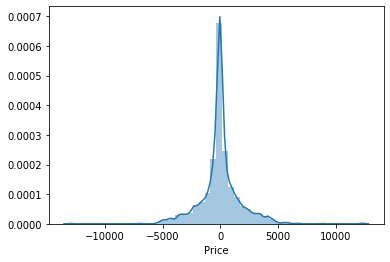

In [238]:
predict( RandomForestRegressor(),1)

In [202]:
from sklearn.linear_model import mLinearRegression


Training score is 0.6152835358071924
predictions are [ 6134.02034143 11060.16167592  4996.721291   ... 11887.26935488
  4361.59203251  9835.22782344]


r2 score is 0.6171726921515084
MAE IS 1944.179249011189
MSE IS 7387653.545624317
RMSE IS 44.09284804830812


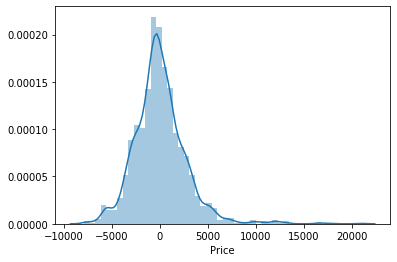

In [203]:
predict( LinearRegression())